# Analysis of classification

In [3]:
%pylab inline
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


In [4]:
t = Table.read('lsst_catalog_test.hdf5')

In [5]:
t.colnames

['ID',
 'col1',
 'col2',
 'col3',
 'col4',
 'col5',
 'image',
 'is_lens',
 'prediction']

In [36]:
# Identify false positive and false negative
p = t['prediction'].squeeze() 
p0 = t['prediction'].squeeze() 
yval = t['is_lens']

upper, lower = 1, 0
p = where(p > 0.7, upper, lower)

tp = p*yval
tp_idx = [i for i in range(len(yval)) if tp[i]==1]
indsort = p0[tp_idx].argsort()
tp_idx = array(tp_idx)[indsort[::-1]]

fp = p*(yval==0)
fp_idx = [i for i in range(len(yval)) if fp[i]==1]
indsort = p0[fp_idx].argsort()
fp_idx = array(fp_idx)[indsort[::-1]]

fn = (p==0) * (yval==1)
fn_idx = [i for i in range(len(yval)) if fn[i]==1]
indsort = p0[fn_idx].argsort()
fn_idx = array(fn_idx)[indsort]

tn = (p==0) * (yval==0)
tn_idx = [i for i in range(len(yval)) if tn[i]==1]
indsort = p0[tn_idx].argsort()
tn_idx = array(tn_idx)[indsort]

In [31]:
tp_idx

[4,
 7,
 11,
 14,
 15,
 18,
 28,
 32,
 34,
 35,
 39,
 40,
 44,
 45,
 48,
 50,
 54,
 59,
 60,
 61,
 62,
 63,
 69,
 72,
 77,
 79,
 82,
 83,
 84,
 85,
 86,
 89,
 96,
 102,
 103,
 112,
 114,
 115,
 117,
 124,
 125,
 126,
 130,
 132,
 133,
 137,
 139,
 141,
 143,
 144,
 149,
 150,
 157,
 160,
 165,
 167,
 170,
 173,
 175,
 176,
 181,
 185,
 186,
 187,
 189,
 193,
 195,
 201,
 205,
 206,
 209,
 210,
 216,
 221,
 226,
 231,
 236,
 239,
 244,
 246,
 248,
 251,
 253,
 257,
 259,
 262,
 263,
 269,
 270,
 271,
 273,
 274,
 276,
 278,
 284,
 285,
 287,
 288,
 290,
 294,
 296,
 299,
 301,
 302,
 313,
 314,
 316,
 319,
 320,
 321,
 328,
 329,
 333,
 338,
 354,
 359,
 361,
 364,
 369,
 370,
 372,
 374,
 376,
 381,
 384,
 387,
 389,
 393,
 398,
 399,
 402,
 406,
 410,
 412,
 418,
 421,
 422,
 423,
 434,
 435,
 441,
 442,
 444,
 446,
 448,
 449,
 452,
 455,
 457,
 460,
 462,
 463,
 469,
 471,
 472,
 473,
 474,
 476,
 477,
 481,
 482,
 487,
 500,
 501,
 505,
 507,
 511,
 514,
 515,
 516,
 517,
 520,
 52

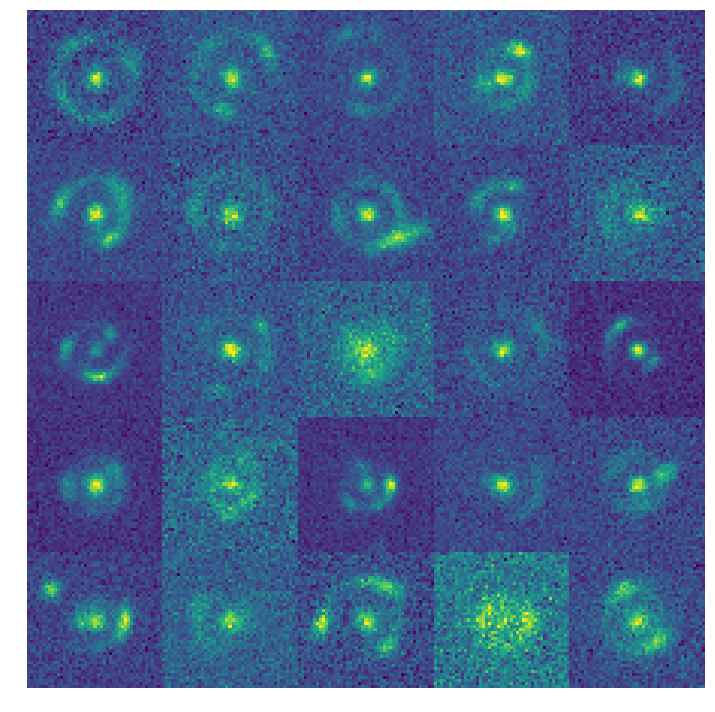

In [37]:
# Plot True positives
figure(figsize=(10,10))
for i in range(25):
    subplot(5,5,i+1)
    imshow(t[tp_idx[i]]['image'][0])
    axis('off')

subplots_adjust(wspace=0, hspace=0)
tight_layout()
subplots_adjust(wspace=0, hspace=0)

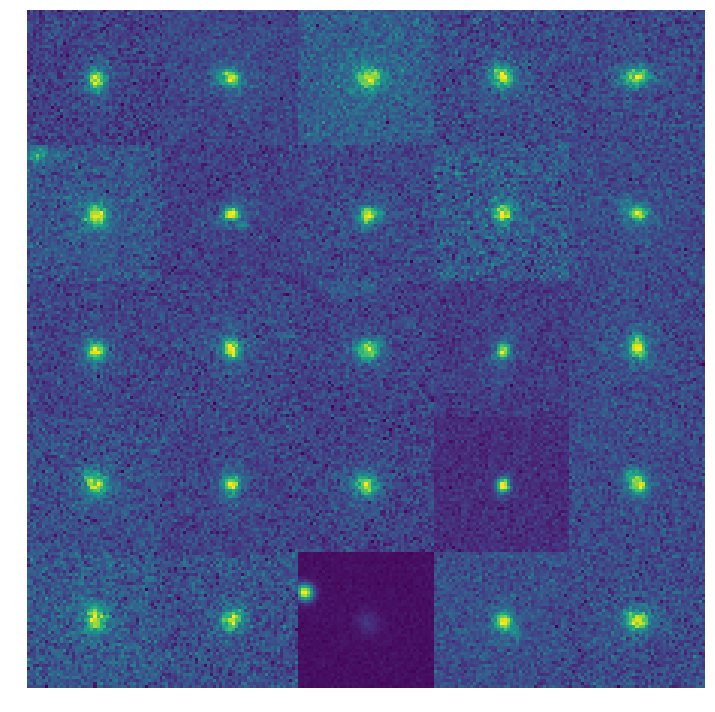

In [38]:
# Plot True Negatives
figure(figsize=(10,10))
for i in range(25):
    subplot(5,5,i+1)
    imshow(t[tn_idx[i]]['image'][0])
    axis('off')

subplots_adjust(wspace=0, hspace=0)
tight_layout()
subplots_adjust(wspace=0, hspace=0)

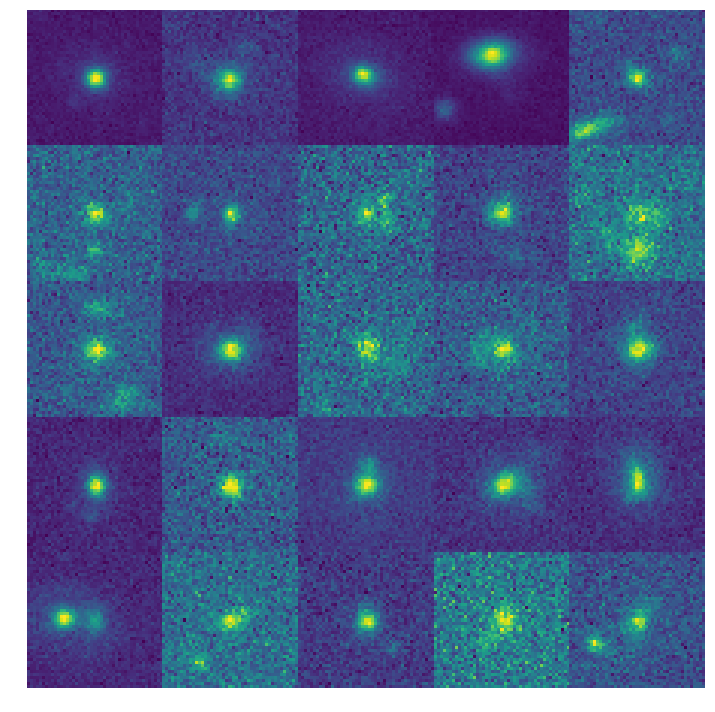

In [39]:
# Plot False Positives
figure(figsize=(10,10))
for i in range(25):
    subplot(5,5,i+1)
    imshow(t[fp_idx[i]]['image'][0])
    axis('off')
subplots_adjust(wspace=0, hspace=0)
tight_layout()
subplots_adjust(wspace=0, hspace=0)

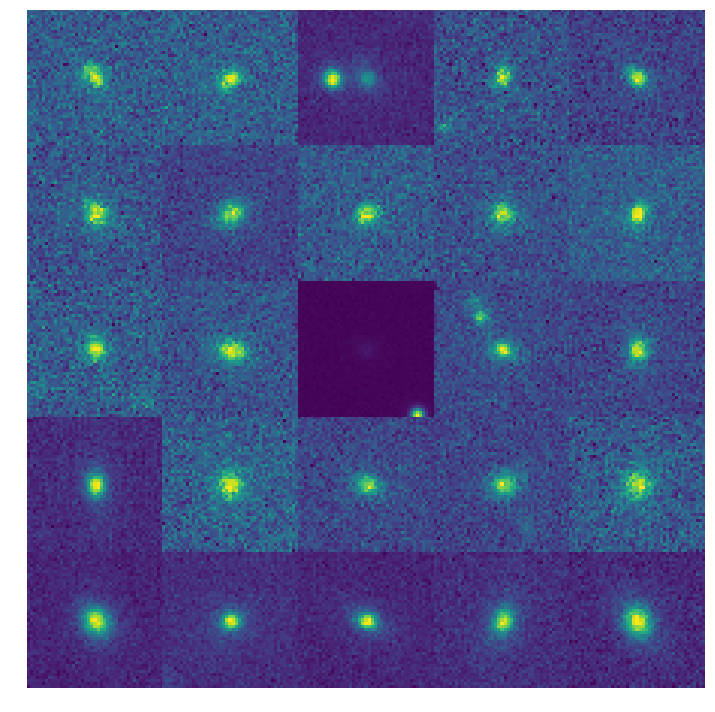

In [40]:
# Plot False Negatives
figure(figsize=(10,10))
for i in range(25):
    subplot(5,5,i+1)
    imshow(t[fn_idx[i]]['image'][0])
    axis('off')
subplots_adjust(wspace=0, hspace=0)
tight_layout()

subplots_adjust(wspace=0, hspace=0)

In [25]:
from sklearn.metrics import roc_auc_score

p = t['prediction'].squeeze() 

In [26]:
roc_auc_score(yval, p)

0.86817245338802018